In [257]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import random
from skimage import io
from shutil import copyfile
import sys
import time

#import tensorflow as tf
#from tensorflow.keras.preprocessing.image import load_img, img_to_array

#data_dir = 'C:\Users\user\Downloads\pfa\CSVFILES\'
#patients = os.listdir(data_dir)
#labels_df = pd.read_csv('annotations.csv')

annotations_file = r'C:\Users\user\Downloads\pfa\CSVFILES\annotations.csv'
annotations_table = pd.read_csv(annotations_file)
annotations_table.head()

seriesuid      coordX      coordY  \
0  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222... -128.699421 -175.319272   
1  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...  103.783651 -211.925149   
2  1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...   69.639017 -140.944586   
3  1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...  -24.013824  192.102405   
4  1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...    2.441547  172.464881   

       coordZ  diameter_mm  
0 -298.387506     5.651471  
1 -227.121250     4.224708  
2  876.374496     5.786348  
3 -391.081276     8.143262  
4 -405.493732    18.545150

In [134]:
candidates_file = r'C:\Users\user\Downloads\pfa\CSVFILES\candidates.csv'
candidates_table = pd.read_csv(candidates_file)
candidates_table.head()

seriesuid  coordX  coordY  coordZ  \
0  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...  -56.08  -67.85 -311.92   
1  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...   53.21 -244.41 -245.17   
2  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...  103.66 -121.80 -286.62   
3  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...  -33.66  -72.75 -308.41   
4  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...  -32.25  -85.36 -362.51   

   class  
0      0  
1      0  
2      0  
3      0  
4      0

(-179.6484375, -365.1484375, 969.5)
(0.703125, 0.703125, 1.0)


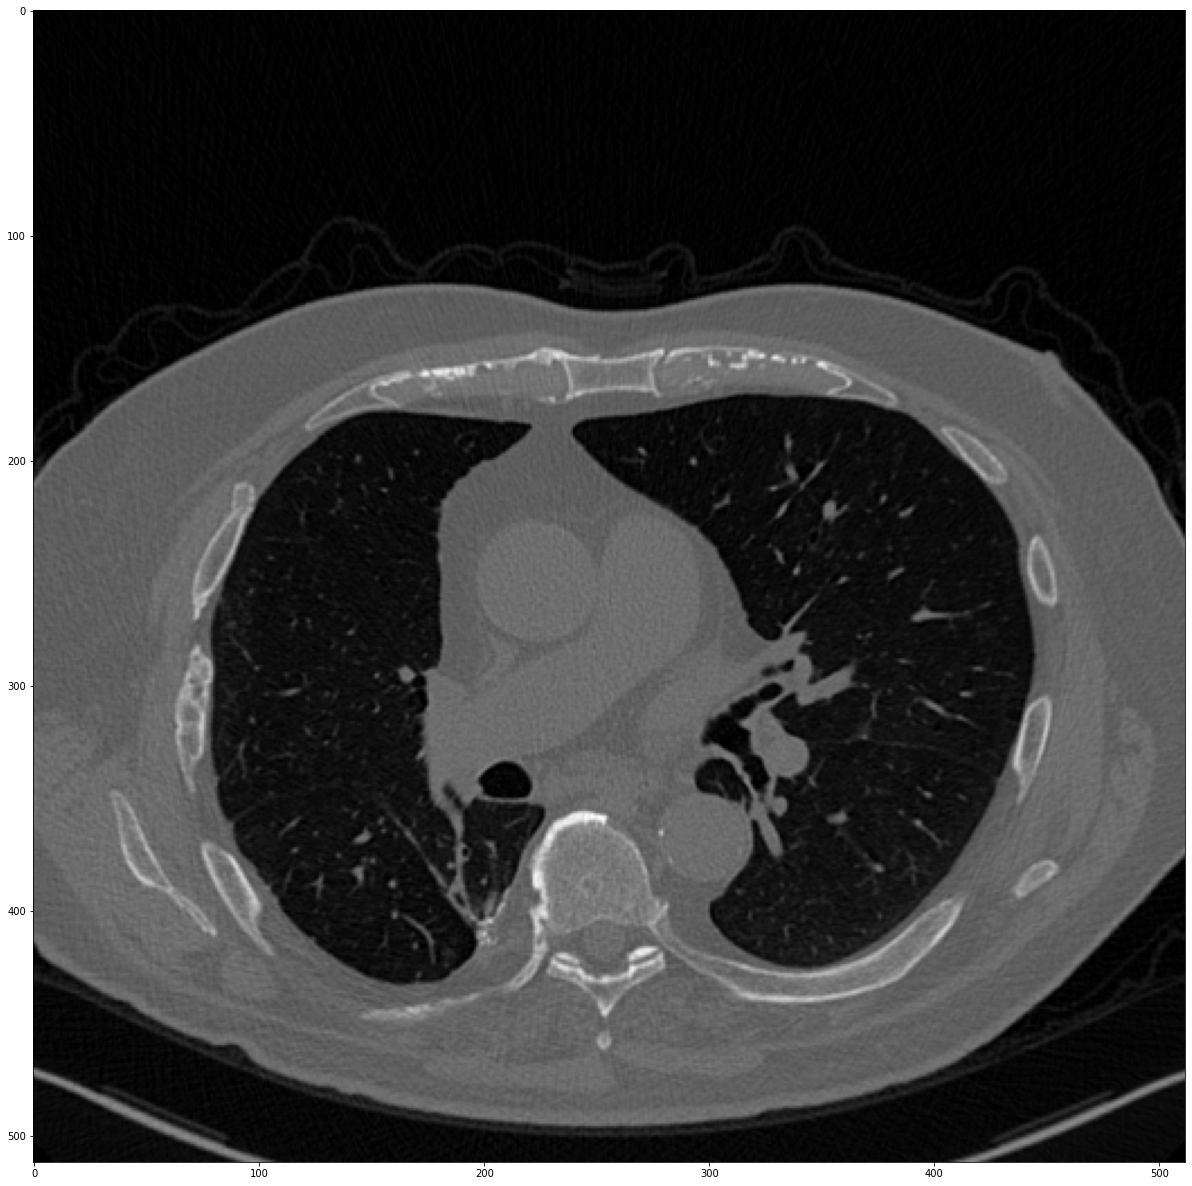

In [308]:
 import SimpleITK as sitk
 
testtest=sitk.ReadImage('C:/Users/user/Downloads/pfa/dataset/1.3.6.1.4.1.14519.5.2.1.6279.6001.301462380687644451483231621986.mhd', sitk.sitkFloat32)
ct_scans = sitk.GetArrayFromImage(testtest)

plt.figure(figsize=(20,16))
plt.gray()
plt.subplots_adjust(0,0,1,1,0.01,0.01) 
'''
i=10
for i in range(ct_scans.shape[0]):
    plt.subplot(10,2,i//10+1), plt.imshow(ct_scans[i]), plt.axis('off')
    i=i+10
'''

print(testtest.GetOrigin())
print(testtest.GetSpacing())

plt.imshow(ct_scans[175])
  


    #use plt.savefig(...) here if you want to save the images as .jpg, e.g.,
plt.show()


In [310]:
def get_voxel_coords(self,x,y,z):
        """
        Converts Cartesian to voxel coordinates
        """
        origin = self.GetOrigin()
        resolution = self.GetSpacing()
        xx=(x-origin[0])/resolution[0]
        yy=(y-origin[1])/resolution[1]
        zz=(z-origin[2])/resolution[2]
        return (xx,yy,zz)

In [330]:
def plot_bbox(img_id):
 # img_url = candidates_table.loc[candidates_table['seriesuid']==img_id]
  img_test=sitk.ReadImage('C:/Users/user/Downloads/pfa/dataset/'+ img_id + '.mhd', sitk.sitkFloat32)
  img = sitk.GetArrayFromImage(img_test)
  height, width, channel = img.shape
  print(f"Image: {img.shape}")
  bboxs = annotations_table[annotations_table['seriesuid']==img_id]
  for index, row in bboxs.iterrows():
      x = row['coordX']
      y = row['coordY']
      z = row['coordZ']
      (xx,yy,zz)=get_voxel_coords(img_test,x,y,z)
      
      #diam = row['diameter_mm']
      diam=10
      xmin = int(xx)-int(diam)
      xmax = int(xx)+int(diam)
      ymin = int(yy)-int(diam)
      ymax = int(yy)+int(diam)
      print(f"x/y/z avant changement: {int(x)}, {int(y)}, {int(z)}")
      print(f"x/y/z apres changement: {int(xx)}, {int(yy)}, {int(zz)}")

      print(f"Coordinates: {xmin,ymin}, {xmax,ymax}")
      
      cv2.rectangle(img[int(zz)], (xmin,ymin), (xmax,ymax), (255,0,0), 2)
      plt.figure(figsize=(15,10))
      plt.title('Image with Bounding Box')
      plt.imshow(img[int(zz)])
      plt.axis("on")
      plt.show()
     
  

In [320]:
img_url='1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860'
'C:/Users/user/Downloads/pfa/subset8/'+ img_url + '.mhd'

'C:/Users/user/Downloads/pfa/subset8/1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860.mhd'

Image: (257, 512, 512)
x/y/z avant changement: -73, 46, -185
x/y/z apres changement: 168, 361, 123
Coordinates: (158, 351), (178, 371)


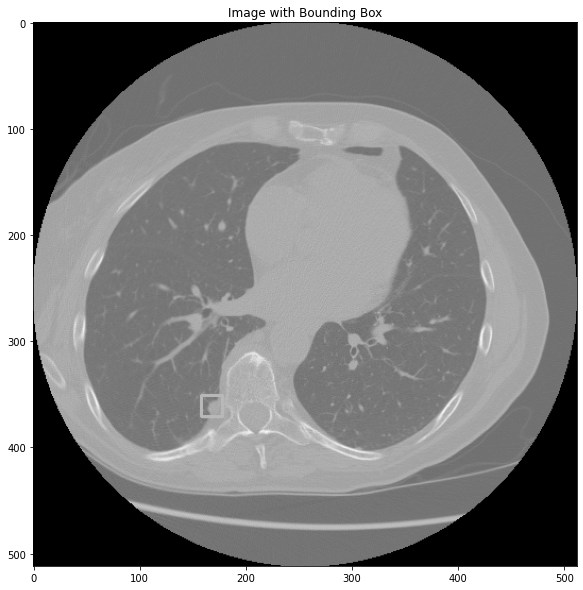

Image: (636, 512, 512)
x/y/z avant changement: -109, -131, -216
x/y/z apres changement: 105, 351, 303
Coordinates: (95, 341), (115, 361)


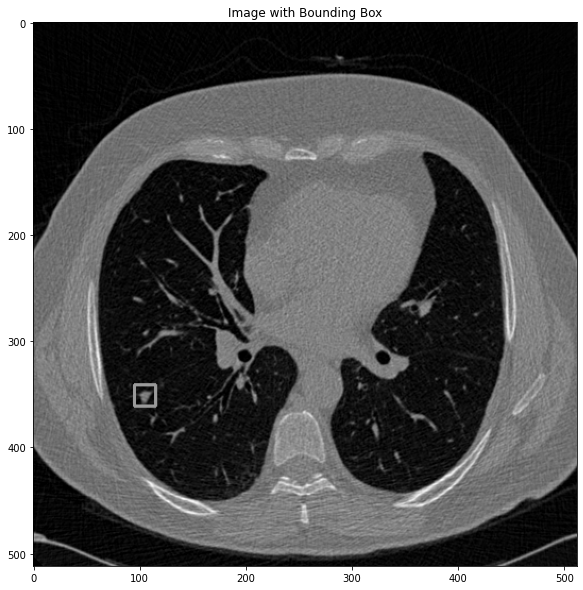

Image: (260, 512, 512)
x/y/z avant changement: -126, -9, -175
x/y/z apres changement: 56, 216, 147
Coordinates: (46, 206), (66, 226)


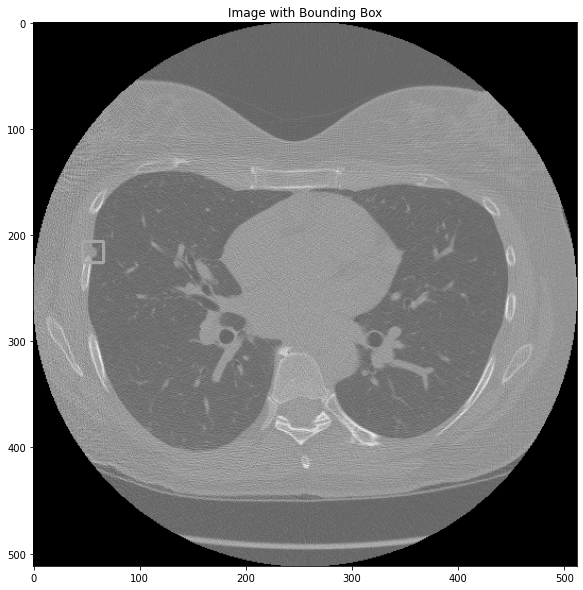

Image: (500, 512, 512)
x/y/z avant changement: 132, -2, -178
x/y/z apres changement: 416, 252, 257
Coordinates: (406, 242), (426, 262)


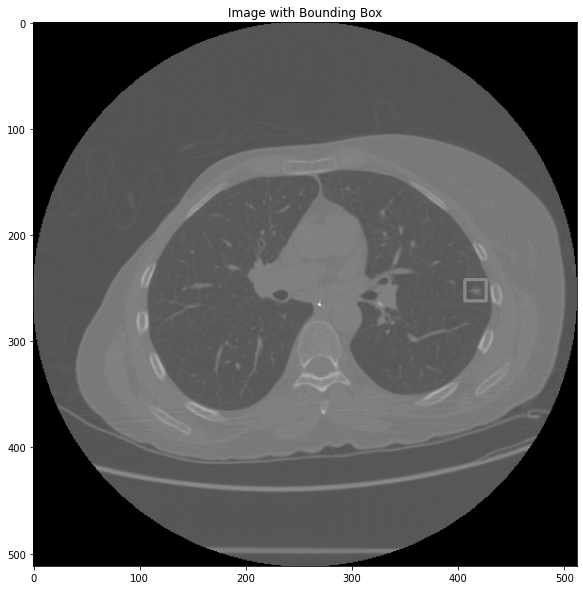

Image: (238, 512, 512)
x/y/z avant changement: 42, 90, -84
x/y/z apres changement: 313, 337, 162
Coordinates: (303, 327), (323, 347)


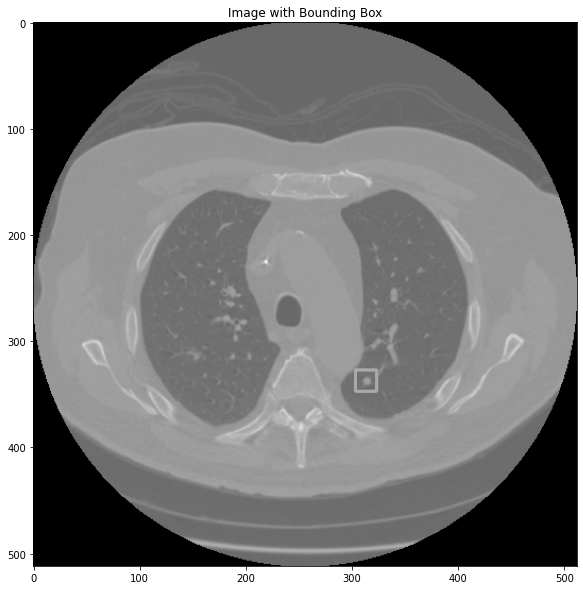

"\nimg_id='1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860'\nplot_bbox(img_id)\n"

In [337]:

least_objects_img_ids = annotations_table["seriesuid"].value_counts().tail(50).index.values

for img_id in random.sample(list(least_objects_img_ids), 5):
  plot_bbox(img_id)

'''
img_id='1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860'
plot_bbox(img_id)
'''
